### Grabbing Gear

In [1]:
import warnings
warnings.filterwarnings("ignore")

# The norms
import pandas as pd
import numpy as np

# Viz libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm # scatter matrix
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

import telco_acquire
import telco_prepare

# Algorithms libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
df = telco_acquire.get_telco_data()
df.head(5)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [3]:
df.describe()

# Just raw df shape with the applied table changes

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
payment_type_id             7043 non-null int64
internet_service_type_id    7043 non-null int64
contract_type_id            7043 non-null int64
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
paperless_billing           7043 non-null object
monthly_charges 

In [5]:
df = telco_prepare.phone_lines(df)
df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,phone_and_multi_line
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,2
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),1
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check,1


In [6]:
df = telco_prepare.partner_dependents(df)
df.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,phone_and_multi_line,partner_and_dependents
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,2,0
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),1,2
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check,1,0


In [7]:
df.streaming_tv.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: streaming_tv, dtype: int64

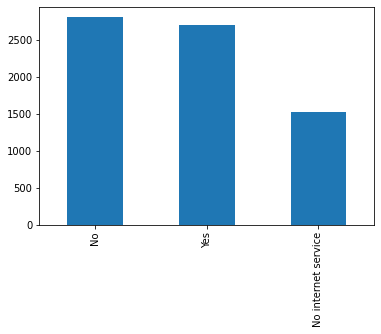

In [8]:
df.streaming_tv.value_counts().plot(kind= "bar")

In [9]:
df.streaming_movies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: streaming_movies, dtype: int64

In [10]:
df.tenure.value_counts().unique()

array([613, 362, 238, 200, 176, 170, 133, 131, 123, 119, 117, 116, 110,
       109, 100,  99,  98,  97,  95,  94,  90,  89,  88,  87,  85,  80,
        79,  76,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,
        63,  61,  60,  59,  57,  56,  51,  50,  11])

In [11]:
df.contract_type.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract_type, dtype: int64

In [12]:
df.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [13]:
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,phone_and_multi_line,partner_and_dependents
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,2,0
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic),1,2
2,1,1,1,0015-UOCOJ,Female,1,No,No,7,Yes,...,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check,1,0
3,1,1,1,0023-HGHWL,Male,1,No,No,1,No,...,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check,0,0
4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,No,...,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic),0,3


In [14]:
df.senior_citizen.value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

In [15]:
df.device_protection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: device_protection, dtype: int64

In [16]:
df.tech_support.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: tech_support, dtype: int64

In [17]:
df.paperless_billing.value_counts()

Yes    4171
No     2872
Name: paperless_billing, dtype: int64

In [18]:
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [19]:
df.online_security.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: online_security, dtype: int64

In [20]:
df.online_backup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: online_backup, dtype: int64

In [21]:
df.payment_type.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_type, dtype: int64

In [22]:
df.partner_and_dependents.value_counts()

0    3280
3    1749
1    1653
2     361
Name: partner_and_dependents, dtype: int64

In [23]:
df.phone_and_multi_line.value_counts()

1    3390
2    2971
0     682
Name: phone_and_multi_line, dtype: int64

In [24]:
df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

#### Whate these value counts are saying (simple math to get percentages - sample / total = %) 

- Data is split nearly perfectly in half between male & female (50.5% M, 49.5% F)
- Only 16% of the customers are senior citizens
- 71% don't use online security
- 66% of customers do NOT have online backup (at least, not through this company)
- 34% have device protection
- 29% have / use tech support
- 62% of the customers are NOT streaming tv
- 61% are NOT streaming movies
- 59% use paperless billing
- 55% of customers are on a month-to-month plan, 24% are on 2-yr, 21% on 1-yr contracts
- 44% have Fiberoptic internet service, 34% DSL, and 22% don't even have it
- 43% are on autopay (22% from account, 21% credit card), 34% pay by electronic check, and 23% still mail in their payments
- 48% have phone lines, 42% have multiple phone lines, and 10% have neither (cellphone?)
- 47% of customers are single, 25% are married w/ kids, 23% are partnered w/o kids, and 5% are single parents

#### Re-iterating STL Concern:

**Why are we losing 27% of our customers to churn, and keeping only 73%?**

In [25]:
# Checking some possible relationships with crosstabs for categoricals

pd.crosstab(df.gender, df.churn)

churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


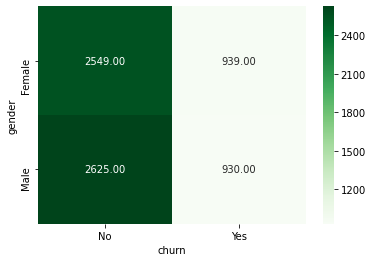

In [26]:
ctab = pd.crosstab(df.gender, df.churn)
sns.heatmap(ctab, annot = True, cmap="Greens", fmt='.2f')


**There's no marked relationship between gender and churn - women churn at 27%, men at 26%**

In [27]:
pd.crosstab(df.senior_citizen, df.churn)

churn,No,Yes
senior_citizen,,
0,4508,1393
1,666,476


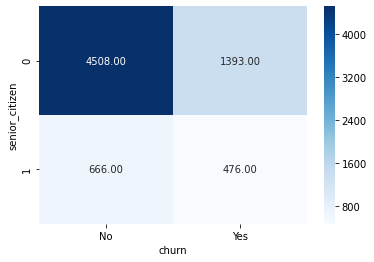

In [28]:
ctab = pd.crosstab(df.senior_citizen, df.churn)
sns.heatmap(ctab, annot = True, cmap = "Blues", fmt = '.2f')

**42% of Senior Citizens churn.  No bueno.  Clearly something to look at**



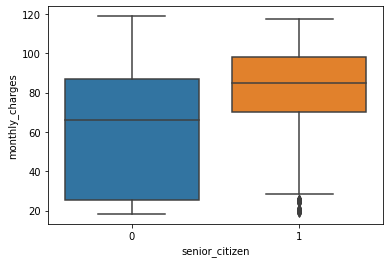

In [62]:
sns.boxplot(y="monthly_charges", x="senior_citizen", data=df)

#### Looks like senior citizens pay about \$15 more per month than non-seniors

In [29]:
pd.crosstab(df.online_security, df.churn)

churn,No,Yes
online_security,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


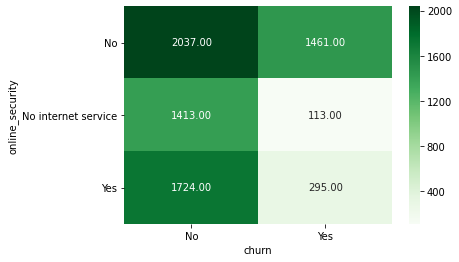

In [30]:
ctab = pd.crosstab(df.online_security, df.churn)
sns.heatmap(ctab, annot = True, cmap = "Greens", fmt = '.2f')

**Only 15% of those with online_security churn; 85% of them stay.  Worth considering how to improve this features' membership**

In [31]:
pd.crosstab(df.online_backup, df.churn)

churn,No,Yes
online_backup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


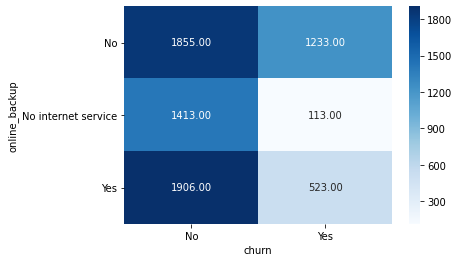

In [32]:
ctab = pd.crosstab(df.online_backup, df.churn)
sns.heatmap(ctab, annot = True, cmap = "Blues", fmt = '.2f')

**Only 7% of those with online backup churn.  Push this more.**

In [33]:
pd.crosstab(df.device_protection, df.churn)

churn,No,Yes
device_protection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


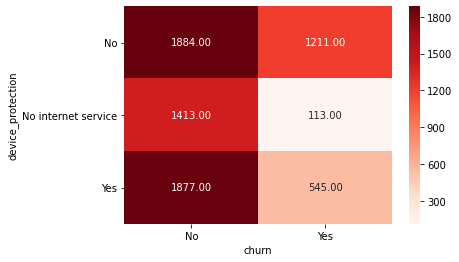

In [34]:
ctab = pd.crosstab(df.device_protection, df.churn)
sns.heatmap(ctab, annot = True, cmap = "Reds", fmt = '.2f')

**Interesting: same numbers as online_backup.  Is 'online_backup' just another way of saying 'device_protection?'  Let's check:**

In [35]:
pd.crosstab(df.online_backup, df.device_protection)

device_protection,No,No internet service,Yes
online_backup,,,
No,1984,0,1104
No internet service,0,1526,0
Yes,1111,0,1318


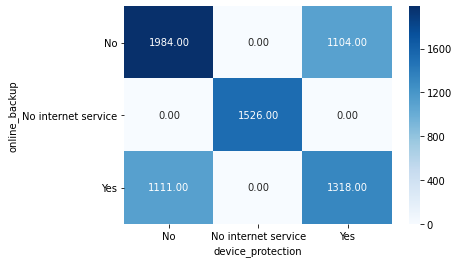

In [36]:
ctab = pd.crosstab(df.online_backup, df.device_protection)
sns.heatmap(ctab, annot = True, cmap = "Blues", fmt = '.2f')

**The answer is 'No,' as the numbers are similar, but not exact.**

In [37]:
pd.crosstab(df.tech_support, df.churn)

churn,No,Yes
tech_support,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


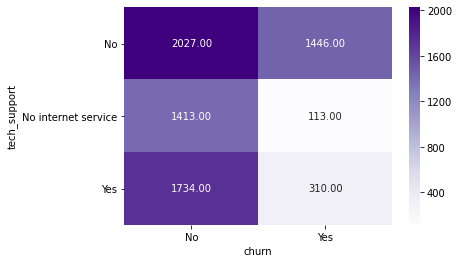

In [38]:
ctab = pd.crosstab(df.tech_support, df.churn)
sns.heatmap(ctab, annot = True, cmap = "Purples", fmt = '.2f')

**15% of those who utilize tech support churn.  Improve customer service  in IT, and market this more.**

In [39]:
pd.crosstab(df.streaming_tv, df.churn)

churn,No,Yes
streaming_tv,,
No,1868,942
No internet service,1413,113
Yes,1893,814


**30% of those streaming TV leave.  Doesn't seem this is any kind of anchor to their staying with us.**

In [40]:
pd.crosstab(df.streaming_movies, df.churn)

churn,No,Yes
streaming_movies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


**Similar numbers to streaming_tv with similar result = not an anchor; don't need to drop one of these columns**

In [41]:
pd.crosstab(df.paperless_billing, df.churn)

churn,No,Yes
paperless_billing,,
No,2403,469
Yes,2771,1400


**Surprisingly, 34% of those with paperless billing still churn.  How we actually bill them is not a strong indicator of their loyalty to us.**

In [42]:
pd.crosstab(df.contract_type, df.churn)

churn,No,Yes
contract_type,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


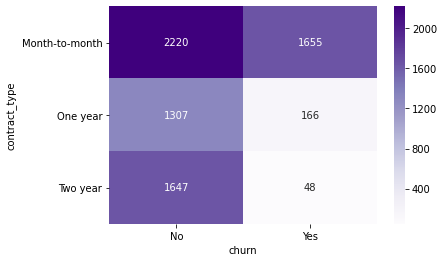

In [63]:
ctab = pd.crosstab(df.contract_type, df.churn)
sns.heatmap(ctab, annot=True, cmap="Purples", fmt="d")

**43% of those on Monthly contracts churn, while 11% of people on 1-year contracts and 3% of with 2-yr contract churn.  Get rid of the the month_to_month and incentivize conversions over to one- and two-year contract terms.**  

In [43]:
pd.crosstab(df.internet_service_type, df.churn)

churn,No,Yes
internet_service_type,,
DSL,1962,459
Fiber optic,1799,1297
None,1413,113


**42% of those with Fiberoptic churn, while only 19% of those with DSL dropped.  Internet_service_type, though, seems - objectively, at least - like it's not a real determinant of loyalty.  ie: these are offerings many other telecom companies provide.**

In [44]:
pd.crosstab(df.payment_type, df.churn)

churn,No,Yes
payment_type,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


**Automatic payments are the way to go.  Only 16% of those with automatic payments churn.  Understandably, Credit Card payments have a higher retention rate over bank transfers.**

In [45]:
pd.crosstab(df.phone_and_multi_line, df.churn)

churn,No,Yes
phone_and_multi_line,,
0,512,170
1,2541,849
2,2121,850


**25% of people without land_lines churn, those with 1 phone line churn at 25% and those with more than one phone line churn at a rate of 29%.** 

In [46]:
pd.crosstab(df.partner_and_dependents, df.churn)

churn,No,Yes
partner_and_dependents,,
0,2157,1123
1,1233,420
2,284,77
3,1500,249


**Loyalty amongst Single people is unpredictable, churning at about 34%.  Married people without kids churn at about 25%, single parents at 21%, and Married people with kids at 14%.**

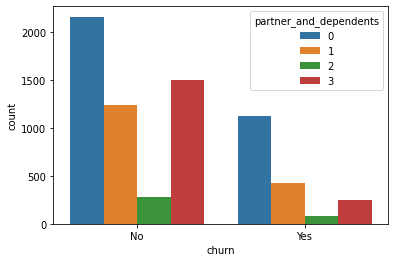

In [47]:
sns.countplot(x="churn", hue="partner_and_dependents", data=df)

#### Just wanted to visualize that a little better.  My original prediction was that it was the single parents who would churn at a higher rate than single people w/o kids.

### From here on out: 

- Looks like the factors driving driving churn are contract_type_id, payment_type, and use of tech_support.

In [48]:
X_train, y_train, X_validate, y_validate, X_test, y_test = telco_prepare.split_telco(df)

In [60]:
X_train.head()

,gender,senior_citizen,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,...,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,DSL,Fiber optic,None,Month-to-month,One year,Two year
customer_id,,,,,,,,,,,,,,,,,,,,,
3714-JTVOV,0,1,2,0,0,0,0,0,1,74.15,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3049-SOLAY,0,0,0,0,0,0,2,2,1,95.20,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5035-PGZXH,0,0,0,2,2,0,2,2,1,106.80,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1051-EQPZR,0,0,1,1,1,1,1,1,0,19.60,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
8755-OGKNA,0,0,1,1,1,1,1,1,0,19.50,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [61]:
from random import seed
from random import randrange

def zero_rule_algo(train, test):
    output_values = [row[-1] for row in train]
    prediction = max(set(output_values), key=output_values.count)
    predicted = [prediction for i in range(len(train))]
    return predicted

zero_rule_algo(X_train, X_test)

['s',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's',
 's'

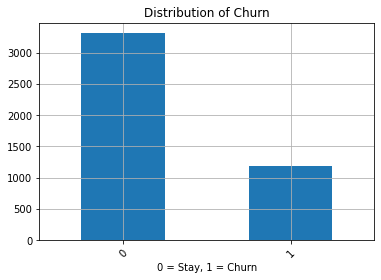

In [49]:
# Quick visualization of churn percentages, 0=stay, 1=churn

X_train.churn.value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Churn")
plt.xlabel("0 = Stay, 1 = Churn")
plt.xticks(rotation=45)
plt.grid(b = True, which = "major")

In [50]:
X_train.columns

Index(['gender', 'senior_citizen', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'phone_and_multi_line', 'partner_and_dependents', 'tenure_years',
       'Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check', 'DSL', 'Fiber optic', 'None',
       'Month-to-month', 'One year', 'Two year'],
      dtype='object')

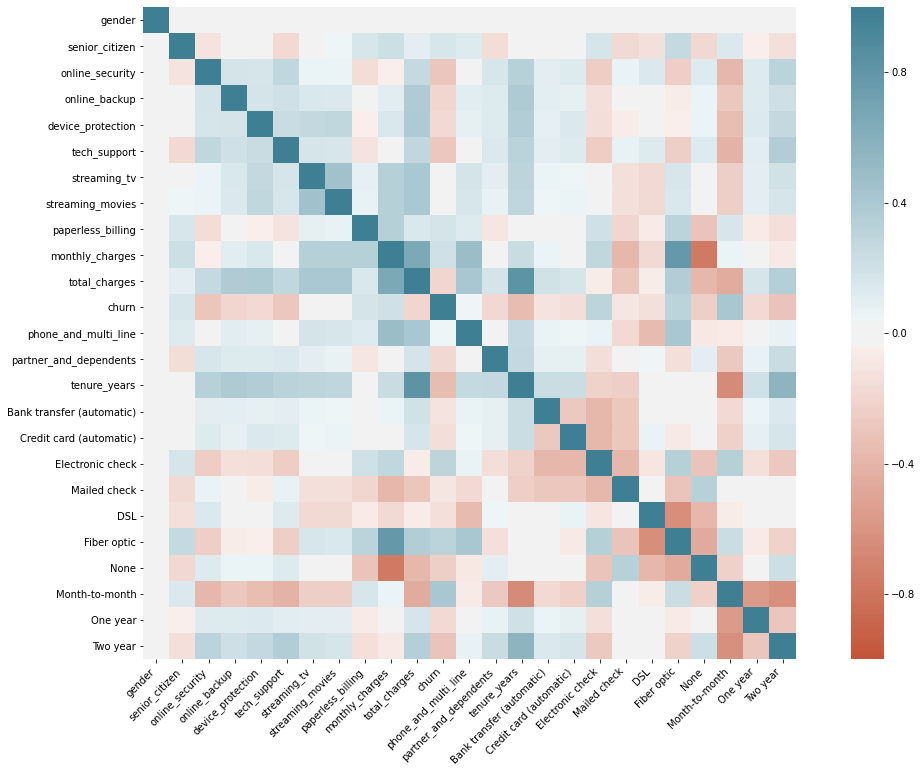

In [51]:
related = X_train.corr()

plt.figure(figsize=(20,12))

ax = sns.heatmap(
    related,
    #cannot annotate, too crowded
    vmin=-1, vmax=1, center=0, # set for r-value range -1, 0, 1
    cmap=sns.diverging_palette(20, 220, n=200), # set blue for colorblindness consideration
    square=True
)
# setting labels to be readable
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Scattering to check continuous variables against each other

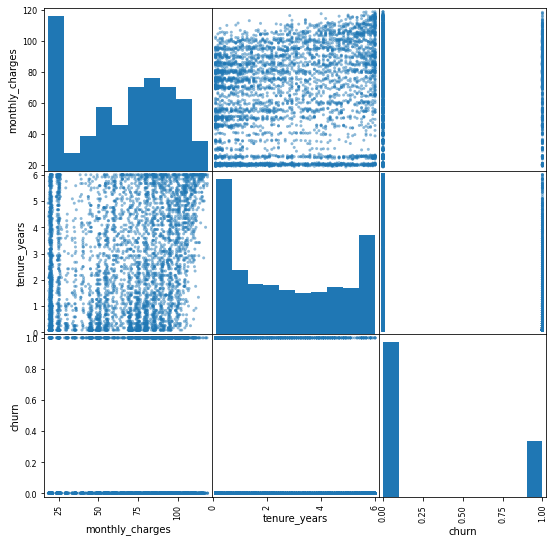

In [52]:
import matplotlib.cm

cmap = cm.get_cmap("gnuplot")

axes = pd.plotting.scatter_matrix(X_train[["monthly_charges", "tenure_years", "churn"]],
                                 figsize=(9, 9), cmap=cmap)


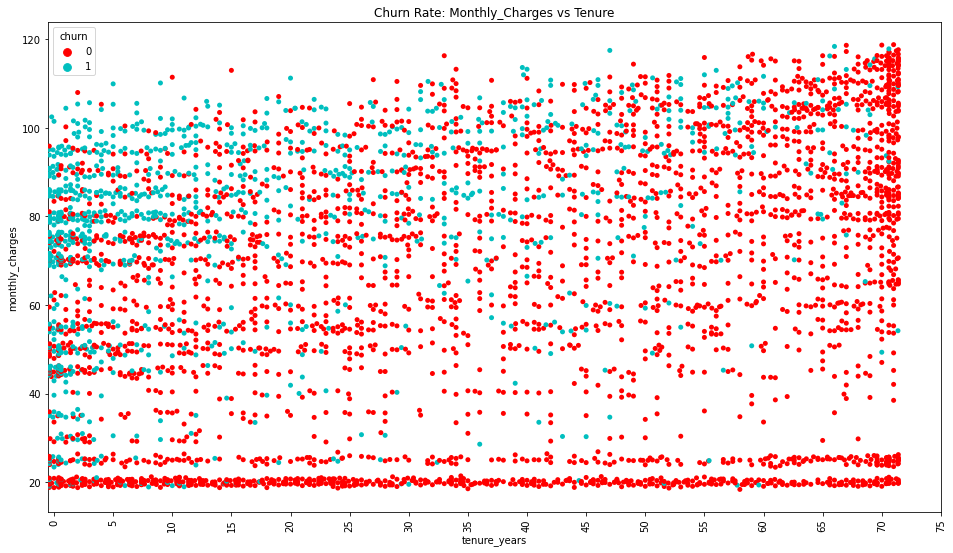

In [53]:
plt.figure(figsize=(16,9))

p = sns.swarmplot(x="tenure_years", y="monthly_charges", hue="churn",
                 palette=["r", "c"], data = X_train)

loc = plt.xticks(list(range(0, 80, 5)))
p.set_xticklabels(labels=list(range(0, 80, 5)), rotation=90, fontsize=10)
plt.title("Churn Rate: Monthly_Charges vs Tenure")
plt.show()

#### The longer they're with us, the less likely they are to churn.  In the montly_charge range of \$70-105,the greatest risk of churn is within the first 18 months 

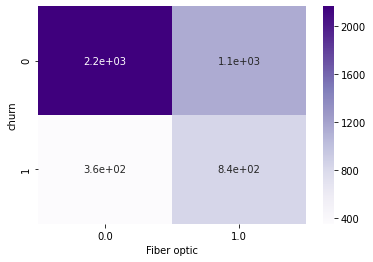

In [64]:
ctab = pd.crosstab(X_train.churn, X_train["Fiber optic"])

sns.heatmap(ctab, annot=True, cmap="Purples")

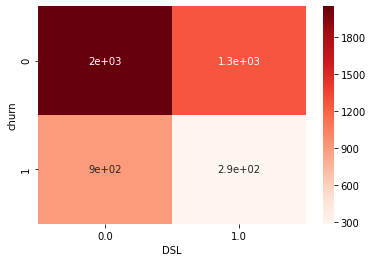

In [65]:
ctab = pd.crosstab(X_train.churn, X_train["DSL"])

sns.heatmap(ctab, annot=True, cmap="Reds")

In [148]:
X = X_train[["tech_support", "Month-to-month", "online_backup"]]
y = X_train[["partner_and_dependents"]]

X_train.head()

,gender,senior_citizen,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,...,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,DSL,Fiber optic,None,Month-to-month,One year,Two year
customer_id,,,,,,,,,,,,,,,,,,,,,
3714-JTVOV,0,1,2,0,0,0,0,0,1,74.15,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3049-SOLAY,0,0,0,0,0,0,2,2,1,95.20,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5035-PGZXH,0,0,0,2,2,0,2,2,1,106.80,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1051-EQPZR,0,0,1,1,1,1,1,1,0,19.60,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
8755-OGKNA,0,0,1,1,1,1,1,1,0,19.50,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
logit = LogisticRegression(C=1, class_weight={1:2}, random_state=123, solver="saga")

In [56]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={1: 2}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [129]:
# printing the coeffieints (weights) and intercept of the model

print("Coefficient: \n", logit.coef_)
print("Intercept: ]n", logit.intercept_)

Coefficient: 
 [[-0.00042178  0.00033079 -0.00186959 -0.00118224 -0.00109684 -0.00184577
  -0.0003352  -0.00030244  0.00022194  0.01470862 -0.00049672 -0.00046965
  -0.00190643 -0.00302238 -0.00032137 -0.00041678  0.00058362 -0.00069602
  -0.00074634  0.00089293 -0.00099713  0.00038404 -0.0004691  -0.00076548]]
Intercept: ]n [-0.00085055]


In [130]:
# estimating if a customer has tech support, using the training data 

y_pred = logit.predict(X_train)

y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [131]:
# Estimating the probability that a person has tech support, using training data

y_pred_prob = logit.predict_proba(X_train)

y_pred_prob

array([[0.62938942, 0.37061058],
       [0.22250095, 0.77749905],
       [0.80018088, 0.19981912],
       ...,
       [0.2854006 , 0.7145994 ],
       [0.51621891, 0.48378109],
       [0.48441832, 0.51558168]])

### Evaluate the Logistic Regression Model

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
import statsmodels.formula.api as smf

In [133]:
print("Accuracy of Logistic Regression classifier on training set: {:.2f}".format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.63


In [134]:
# Create confusion matrix

print(confusion_matrix(y_train, y_pred))

[[1956 1354]
 [ 313  877]]


#### So using Logistic Regression to test if customers were senior citizens with online backup on a month-to-month plan had used tech support, we got 1,956 true positives(true predictions), 1,354 FPs, 313 FNs, and 877 TNs

In [135]:
#Compute Precision, Recall, F1-score, and Support

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.59      0.70      3310
           1       0.39      0.74      0.51      1190

    accuracy                           0.63      4500
   macro avg       0.63      0.66      0.61      4500
weighted avg       0.74      0.63      0.65      4500



### Decision Tree Model

In [136]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=123)

clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [137]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [145]:
y_train.head()

,churn
customer_id,
3714-JTVOV,1
3049-SOLAY,1
5035-PGZXH,0
1051-EQPZR,0
8755-OGKNA,0


In [139]:
# predicting relationship / kids
# calculate the probability that the prediction is correct

y_pred = clf.predict(X_train)

y_pred_proba = clf.predict_proba(X_train)

In [140]:
y_pred[0:10]

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0])

In [141]:
y_pred_proba

array([[0.62857143, 0.37142857],
       [0.28307692, 0.71692308],
       [0.70652174, 0.29347826],
       ...,
       [0.51094891, 0.48905109],
       [0.98151571, 0.01848429],
       [0.98151571, 0.01848429]])

In [151]:
labels = sorted(y_train..unique())
predicted_labels = [name + "predicted" for name in labels]

conf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=[predicted_labels])
conf.index.name = "actual"

conf

AttributeError: 'DataFrame' object has no attribute 'customer_id'

In [67]:
a, b = X_train[col], X_train["churn"]

observed = pd.crosstab(a, b)
chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Null hypothesis is rejected - ({} and churn) are dependent on each other. (p={})".format(col, p))
    
if p > alpha:
    print("We fail to reject the null hypothesis.  ({} and churn) are INDEPENDENT of each other. (p={})".format(col, p))

NameError: name 'col' is not defined

### Logistic regression model

In [73]:
from sklearn.linear_model import LogisticRegression

X_train = X_train.drop(["churn"], axis=1)

KeyError: "[('churn',)] not found in axis"

In [75]:
X_validate = X_validate.drop(["churn"], axis=1)

KeyError: "['churn'] not found in axis"

In [76]:
X_test = X_test.drop(["churn"], axis=1)

KeyError: "['churn'] not found in axis"

In [74]:
model = LogisticRegression().fit(X_train, y_train)
y_pred = model.predict(X_validate)